- https://algorithm.joho.info/programming/python/numpy-fft-power-spectrum/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'tokyo_temp00-18.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Temperature,,Unnamed: 3
0,2000-01-01,8.6,8,1
1,2000-01-02,6.9,8,1
2,2000-01-03,9.2,8,1
3,2000-01-04,9.8,8,1
4,2000-01-05,9.3,8,1


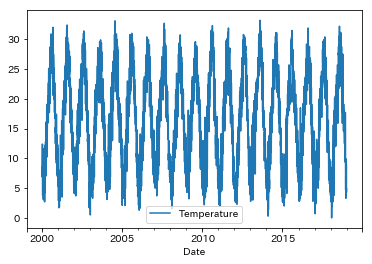

In [3]:
df.plot(x='Date', y='Temperature')

In [4]:
tmp=df['Temperature'].values
temp=np.array(tmp)
#temp=np.array(tmp[:len(tmp)])
t=np.arange(0,len(temp))

In [5]:
N = 24            # サンプル数
day = 365          # サンプリング間隔
#f1, f2 = 10, 20    # 周波数
t = np.arange(0, N*dt ) # 時間軸
freq = np.linspace(0, N, N*day) # 周波数軸

NameError: name 'dt' is not defined

## surrogate data

In [6]:
ts=temp
ts_fourier  = np.fft.rfft(ts)
random_phases = np.exp(np.random.uniform(0,np.pi, int(len(ts)/2+1))*1.0j)
ts_fourier_new = ts_fourier*random_phases
new_ts = np.fft.irfft(ts_fourier_new)

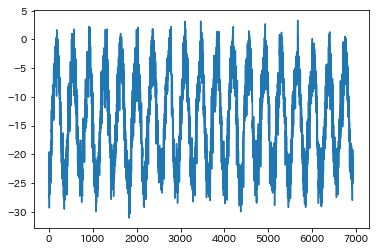

In [7]:
plt.plot(new_ts)

In [8]:
len(ts)

6940

In [9]:
from math import log
import numpy as np

#with open('data.txt', 'r') as f:
#    data = [float(i) for i in f.read().split()]
data=ts

N = len(data)
eps = 0.001
lyapunovs = [[] for i in range(N)]

for i in range(N):
    if i%1000==0:
        print(i)
    for j in range(i + 1, N):
        if np.abs(data[i] - data[j]) < eps:
            for k in range(min(N - i, N - j)):
                #print("yes")
                #print(np.abs(data[i+k] - data[j+k]))
                lyapunovs[k].append(log(max(0.1,np.abs(data[i+k] - data[j+k]))))

with open('lyapunov.txt', 'w') as f:
    for i in range(len(lyapunovs)):
        if len(lyapunovs[i]):
            f.write(i, sum(lyapunovs[i]) / len(lyapunovs[i]))
            #string = str((i, sum(lyapunovs[i]) / len(lyapunovs[i])))
            #f.write(string + '\n')

0
1000
2000
3000
4000
5000
6000


TypeError: write() takes exactly one argument (2 given)

In [ ]:
from math import log
 
def d(series,i,j):
    return abs(series[i]-series[j])
 
f=open('timeseries.txt', 'r')
series=[float(i) for i in f.read().split()]
f.close()


N=len(series)
eps=input('Initial diameter bound: ')
dlist=[[] for i in range(N)]
n=0 #number of nearby pairs found
for i in range(N):
    for j in range(i+1,N):
        if d(series,i,j) < eps:
            n+=1
            print n
            for k in range(min(N-i,N-j)):
                dlist[k].append(log(d(series,i+k,j+k)))
f=open('lyapunov.txt','w')
for i in range(len(dlist)):
    if len(dlist[i]):
        print>>f, i, sum(dlist[i])/len(dlist[i])
f.close()

In [18]:
print(len(lyapunovs))

ll=np.array(lyapunovs)


6940


In [23]:
ll

6940

In [200]:
tt=[]
bb=[]
with open('lyapunov.txt', 'r') as f:
    #f.strip("(",")")
    tt=f.read()
    #tt= [i for i in f.read().split()]
tt
#bb= tt.strip("(",")")

'(0, -2.302585092991939)\n(1, 0.3928413525656838)\n(2, 0.6922922355442982)\n(3, 0.7873436485188327)\n(4, 0.8358321425405301)\n(5, 0.8642047963243573)\n(6, 0.8759377363032039)\n(7, 0.892378184390894)\n(8, 0.9003443052798319)\n(9, 0.9142456829013459)\n(10, 0.9337468248418935)\n(11, 0.95511919111504)\n(12, 0.9715814503694709)\n(13, 0.9842175180535542)\n(14, 0.9911184768770614)\n(15, 1.0086749346140145)\n(16, 1.0249297529471035)\n(17, 1.0394688612753473)\n(18, 1.0651734453652741)\n(19, 1.0851319095235288)\n(20, 1.104819942457711)\n(21, 1.119627098946948)\n(22, 1.144021499790669)\n(23, 1.1604277640989689)\n(24, 1.180917054277381)\n(25, 1.1989088362419618)\n(26, 1.2144955375048196)\n(27, 1.2325809642212413)\n(28, 1.2491114641766343)\n(29, 1.272047079330844)\n(30, 1.2842434309938988)\n(31, 1.2964924546903622)\n(32, 1.3058301835612236)\n(33, 1.3258933595650908)\n(34, 1.3418658665808438)\n(35, 1.355199643986984)\n(36, 1.3714467420205365)\n(37, 1.3817453832923559)\n(38, 1.3942698630244594)\n(39,

## パワースペクトルを調べる？それによりIAFFTを作りたいから？

In [172]:
Pow = np.abs(ts_fourier)**2
len(Pow)

3451

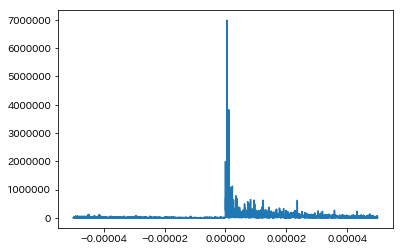

In [178]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

data = ts
ps = np.abs(np.fft.fft(data))**2
#ps = np.abs(ts_fourier[20:])**2
time_step = 10000
freqs = np.fft.fftfreq(ps.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

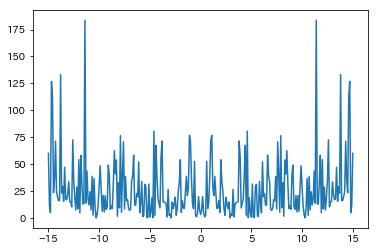

In [151]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

data = np.random.rand(301) - 0.5
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])

In [106]:
#df = pd.read_csv(r'tokyo_temp.csv',header=None)
#df